# Probability distributions

Set Jupyter table style

In [1]:
%%html
<style>
table {margin-left: 20px !important;}
th {text-align: left !important;}
</style>

Import python modules

In [2]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

### Table of Contents

I. [Background](#background)

II. [Discrete probability distributions](#discrete)

 | Distribution              | Parameters   | scipy.stats   |
 |:--------------------------|:------------:|:--------------|
 | [Binomial](#binom)        | n, p         | .binom        |
 | [Geometric](#geom)        | p            | .geom         |
 | [Hypergeometric](#hyperg) | M, n, N      | .hypergeom    |
 | [Poisson](#poisson)       | $\mu$        | .poisson      | 

III. [Continuous probability distributions](#continuous)

| Distribution              | Parameters   | scipy.stats   |
|:--------------------------|:------------:|:--------------|
| [Uniform](#uni)           | loc, scale   | .uniform      |
| [Exponential](#expo)      | $\mu$        | .expon        |
| [Normal](#normal)         | $\mu, \sigma$| .norm         |
| [Student's t](#tdist)     | df           | .t            |

IV. [Common scipy.stats distribution methods](#scipy)

V. [Sources](#sources)

##  Background<a class="anchor" id="background"></a>

A **random variable** discribes all of the possible numerical outcomes of a random phenomenon.

A statistical experiment determines a specific value of a random variable which can chage on repitition of the experiment. A **probability distribution** gives all posssible values of a random variable and their corresponding probabilities.   

Uppercase X, Y denote random variables (a description given as text) <br>
Lowercase x, y denote a value of a random variable (an instance given as a number)

## Discrete probability distributions <a class="anchor" id="discrete"></a>

A **probability mass function (pmf)** gives the probability of a discrete random variable for different exact values. Each probability is between 0 and 1, inclusive. The sum of the probabilities is 1. *Note: pmfs are also sometimes called probability distribution functions which gives the same acronym used for probability density functions (pdf), the analogous functions of continous probability distributions.* 

A **cumulative distribution function (cdf)** gives the probability that a random variable is less than or equal to a given value.

### Binomial  <a class="anchor" id="binom"></a> 

X ~ B(n, p)<br>

A discrete random variable that gives the distribution of the number of successes in **n** independent and identically distributed Bernoulli trials with probability of success **p**

In [3]:
# Illowsky - example 4.15 part b 
# Mean and variance 
n = 200
p = 0.0128
mean, var = stats.binom.stats(n, p)
mean_formula = n * p
std_dev = np.sqrt(var)
std_dev_formula = np.sqrt(n * p * (1 - p)) 
print('Binomial distribution (n={0}, p={1})'.format(n, p))
print(' mean    = {0:.4f} (calculated by scipy)'.format(mean))
print(' mean    = {0:.4f} (calculated as n * p)'.format(mean_formula))
print(' std dev = {0:.4f} (calculated from scipy variance)'.format(std_dev))
print(' std dev = {0:.4f} (calculated as (sqrt(npq)))'.format(std_dev_formula))

Binomial distribution (n=200, p=0.0128)
 mean    = 2.5600 (calculated by scipy)
 mean    = 2.5600 (calculated as n * p)
 std dev = 1.5897 (calculated from scipy variance)
 std dev = 1.5897 (calculated as (sqrt(npq)))


In [4]:
# cumulative density function and probability mass function 
x = 8
print(' probability of {0} or less successes = {1:.4f}'.format(x, stats.binom.cdf(x, n, p))) # prob <= x

for x in [5, 6]:
    print(' probability of exactly {0} successes = {1:.4f}'.format(x, stats.binom.pmf(x, n, p))) # prob = x

 probability of 8 or less successes = 0.9988
 probability of exactly 5 successes = 0.0707
 probability of exactly 6 successes = 0.0298


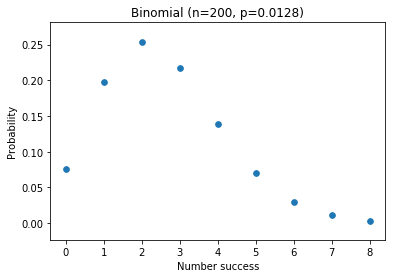

In [5]:
# graph binomial 
n = 200
p = 0.0128

# x = np.arange(0, n) # entire range not practile
# Instead chose range within some probability threshold
x = np.arange(stats.binom.ppf(0.001, n, p), stats.binom.ppf(0.999, n, p))

plt.figure()
plt.scatter(x, stats.binom.pmf(x, n, p), s=32)
plt.title('Binomial (n={0}, p={1})'.format(n, p))
plt.xlabel('Number success')
plt.ylabel('Probability')
plt.show()
plt.close()

# Alternatively, the distribution object can be called (as a function) to fix the shape and location.
# This returns a “frozen” RV object holding the given parameters fixed.

In [6]:
# Generate list of random numbers from binomial
n = 200
p = 0.0128
r = stats.binom.rvs(n, p, size=20)
print(r)

[4 4 4 0 2 3 0 1 5 6 1 2 2 1 2 4 2 2 2 5]


### Geometric <a class="anchor" id="geom"></a>

X ~ G(p)

A discrete random variable that gives the distribution of the number of independent trials before the first success occurs for independent Bernoulli trials with constant probability of success **p**. *Note: success is only semantic, works equally with 'failure' as long as associated probability is used* 

mean = 1/p<br>
std dev = $\sqrt{((1 / p) * ((1 / p) - 1))}$

In [7]:
# Illowsky - example 4.18
# mean and variance
p = 0.35
mean, var = stats.geom.stats(p)
print('Geometric distribution (p = {0})'.format(p))
print(' mean    = {0:.4f}'.format(float(mean)))
print(' std dev = {0:.4f}'.format(np.sqrt(var)))

Geometric distribution (p = 0.35)
 mean    = 2.8571
 std dev = 2.3035


In [8]:
# cumulative density function and probability mass function 
n = 3
print(' probability first success occurs at exactly {0} trials = {1:.4f}'.format(n, stats.geom.pmf(n, p)))
print(' probability first success occurs within {0} trials = {1:.4f}'.format(n, stats.geom.cdf(n, p)))

 probability first success occurs at exactly 3 trials = 0.1479
 probability first success occurs within 3 trials = 0.7254


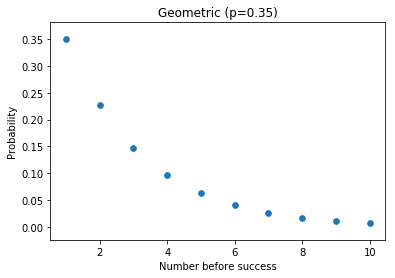

In [9]:
# graph Geometric 
p = 0.35

x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))

plt.figure()
plt.scatter(x, stats.geom.pmf(x, p), s=32)
plt.title('Geometric (p={0})'.format(p))
plt.xlabel('Number before success')
plt.ylabel('Probability')
plt.show()
plt.close()

In [10]:
# generate list of random numbers from geometric
p = 0.35
r = stats.geom.rvs(p, size=20)
print(r)

[2 5 7 5 3 1 2 3 1 1 3 4 7 5 2 6 6 1 5 4]


### Hypergeometric <a class="anchor" id="hyperg"></a>

X ~ H(M, n, N)
Scipy notation: p(k, M, n, N). *Text uses alternative notation and Wikipedia currently uses yet another* <br>

A discrete random variable that gives the distribution of the number of individuals from a subgroup expected in a sample taken without replacement.

**k** = number of objects drawn from subgroup of interest (generally interested in p(k, M, n, N) vs. k) <br>
**M** = number of objects in population <br>
**n** = number of objects in subgroup of interest in the population <br>
**N** = sample size (number of objects draw without replacement)


In [11]:
# Illowsky - 4.25
# mean and variance

M = 6 + 5
n = 6
N = 4  
mean, var = stats.hypergeom.stats(M, n, N)
mean_formula = n * N / M
std_dev_formula = np.sqrt(N * (n / M) * ((M - n) / M) * ((M - N) / (M - 1)))

print('Hypergeometric distribution (M = {0}, n = {1}, N = {2})'.format(M, n, N))
print(' mean    = {0:.4f}'.format(float(mean) )) # Expected value from group of interest
print(' mean    = {0:.4f}'.format(float(mean_formula) )) # Expected value from group of interest
print(' std dev = {0:.4f}'.format(np.sqrt(var)))
print(' std dev = {0:.4f}'.format(std_dev_formula))

Hypergeometric distribution (M = 11, n = 6, N = 4)
 mean    = 2.1818
 mean    = 2.1818
 std dev = 0.8332
 std dev = 0.8332


In [12]:
# cumulative density function and probability mass function 
x = 2
print(' probability exactly {0} from group of interest = {1:.4f}'\
      .format(x, stats.hypergeom.pmf(x, M, n, N)))
print(' probability of {0} or less from group of interest = {1:.4f}'\
      .format(x, stats.hypergeom.cdf(x, M, n, N)))

 probability exactly 2 from group of interest = 0.4545
 probability of 2 or less from group of interest = 0.6515


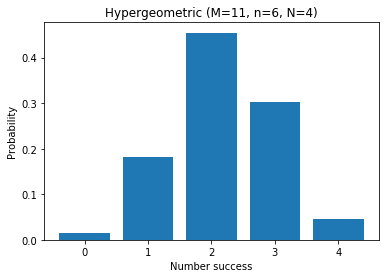

In [13]:
# graph hypergeometric
M = 6 + 5
n = 6
N = 4  

# For this case, just showing entire range makes more sence
# x = np.arange(stats.hypergeom.ppf(0.001, M, n, N), stats.hypergeom.ppf(0.999, M, n, N))
x = np.arange(0,5)

plt.figure()
plt.bar(x, stats.hypergeom.pmf(x, M, n, N))
plt.title('Hypergeometric (M={0}, n={1}, N={2})'.format(M, n, N))
plt.xlabel('Number success')
plt.ylabel('Probability')
plt.show()
plt.close()

### Poisson<a class="anchor" id="poisson"></a>

X ~ P($\mu$)

Probability of a number of occurances of a discrete, independent event given the average rate of that event, generally notated as $\mu$ or $\sigma$. *Note: the interval is defined by $\mu$ (i.e. per day vs. per year)*   

In [14]:
# Illowsky - Example 4.29
# mean and variance
mu = (6 / 2) * 0.25  # given rate (6 in 2 hr, interested in 15 min (0.25 hr) interval)
mean, var = stats.poisson.stats(mu)
std_dev = np.sqrt(var)
print('Poisson (mu = {0})'.format(mu))
print(' mean    = {0:.4f}'.format(mean))
print(' std dev = {0:.4f}'.format(std_dev))

Poisson (mu = 0.75)
 mean    = 0.7500
 std dev = 0.8660


In [15]:
# cumulative density function and probability mass function 
x = 1

print(' probability of {0} or less = {1:.4f}'.format(x, stats.poisson.cdf(x, mu))) # prob <= x
print(' probability of exactly {0} = {1:.4f}'.format(x, stats.poisson.pmf(x, mu))) # prob = x
print(' probability of more than {0} = {1:.4f}'.format(x, stats.poisson.sf(x, mu))) 
# (1 - .cdf) = .sf, but .sf method is more accurate
print(' probability of more than {0} = {1:.4f} (alternative calculation)'.\
      format(x, 1 - stats.poisson.cdf(x, mu))) # prob < x

 probability of 1 or less = 0.8266
 probability of exactly 1 = 0.3543
 probability of more than 1 = 0.1734
 probability of more than 1 = 0.1734 (alternative calculation)


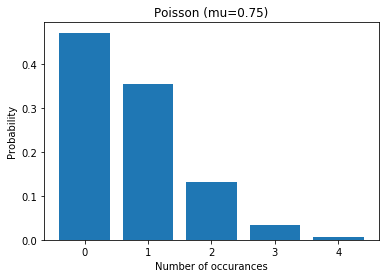

In [16]:
# graph Poisson

x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.999, mu))

plt.figure()
plt.bar(x, stats.poisson.pmf(x, mu))
plt.title('Poisson (mu={0})'.format(mu))
plt.xlabel('Number of occurances')
plt.ylabel('Probability')
plt.show()
plt.close()

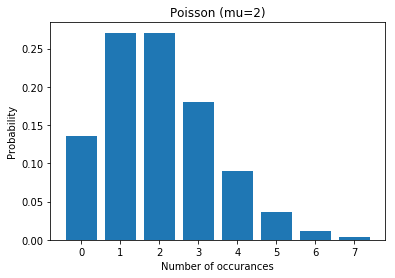

In [17]:
# graph Poisson

mu = 2

x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.999, mu))

plt.figure()
plt.bar(x, stats.poisson.pmf(x, mu))
plt.title('Poisson (mu={0})'.format(mu))
plt.xlabel('Number of occurances')
plt.ylabel('Probability')
plt.show()
plt.close()

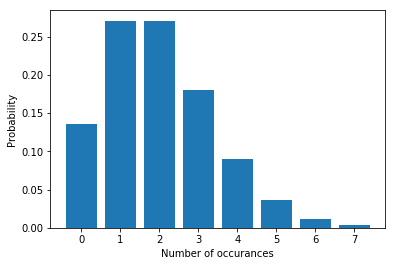

In [18]:
# Poisson using equation rather than scipy method

k_range = range(8)     #  list of k (numer of events) to look at
lamb = 2            #  (events per interval (i.e. 0.75 per 15 min))

p_k = [((np.e ** -lamb) * (lamb ** k)) / np.math.factorial(k) for k in k_range]

plt.figure()
plt.bar(k_range, p_k)
plt.xticks(k_range)
plt.xlabel('Number of occurances')
plt.ylabel('Probability')
plt.show()
plt.close()

## Continuous probability distributions <a class="anchor" id="continuous"></a>

### Uniform<a class="anchor" id="uni"></a>

X ~ U(a, b)

A continuous probability distribution of events that are equally likely from lowest possible value **a** to highest **b**. *Note: scipy defines with loc=a and scale=b-a*

The formula is relatively trivial without scipy functions. 
```
 mean = (a + b) / 2
 std = sqrt((1/12) * (b - a) ** 2)
 pdf = 1 / b - a
 cdf = 0  for x <= a,  
     = (x - a)/(b - a) for a < x < b 
     = 1  for x >= b) 
 ```

In [19]:
# Illowsky - Example 5.2
# mean and variance
a = 0
b = 23

mean, var = stats.uniform.stats(loc=a, scale=b-a) # Defaults to loc=0 scale=1
std_dev = np.sqrt(var)

mean_formula = (a + b) / 2
std_dev_formula = np.sqrt(((b - a) ** 2) / 12)

print('Uniform distribution (a={0}, b={1})'.format(a, b))
print(' mean    = {0:8.2f}'.format(mean))
print(' mean    = {0:8.2f}'.format(mean_formula))
print(' std dev = {0:8.2f}'.format(std_dev))
print(' std dev = {0:8.2f}'.format(std_dev_formula))

Uniform distribution (a=0, b=23)
 mean    =    11.50
 mean    =    11.50
 std dev =     6.64
 std dev =     6.64


In [20]:
# Illowsky - Example 5.2
# data
data = [10.4, 19.6, 18.8, 13.9, 17.8, 16.8, 21.6, 17.9, 12.5, 11.1, 
         4.9, 12.8, 14.8, 22.8, 20.0, 15.9, 16.3, 13.4, 17.1, 14.5, 
        19.0, 22.8,  1.3,  0.7,  8.9, 11.9, 10.9,  7.3,  5.9,  3.7,
        17.9, 19.2,  9.8,  5.8,  6.9,  2.6,  5.8, 21.7, 11.8,  3.4,
         2.1,  4.5,  6.3, 10.7,  8.9,  9.4,  9.4,  7.6, 10.0,  3.3,
         6.7,  7.8, 11.6, 13.8, 18.6]

data = np.array(data)
print('data mean    = {0:8.2f}'.format(data.mean()))
print('data std dev = {0:8.2f}'.format(data.std()))

data mean    =    11.65
data std dev =     6.03


In [21]:
# Illowsky - Example 5.3 (cont. from 5.2)
x =  2
y = 18

prob = 1 - stats.uniform.cdf(x, a, b - a) - stats.uniform.sf(y, a, b - a)
prob_formula = (y - x) * 1 / (b - a)

print(' probability between {0} and {1} = {2:.4f}'.format(x, y, prob))
print(' probability between {0} and {1} = {2:.4f}'.format(x, y, prob_formula))

 probability between 2 and 18 = 0.6957
 probability between 2 and 18 = 0.6957


In [22]:
# Illowsky - Example 5.3b
p = 0.90

print('The {0} percentile is at {1:.4f}'.format(p * 100, stats.uniform.ppf(p, a, b - a)))
print('The {0} percentile is at {1:.4f}'.format(p * 100, (p / (1 / (b - a))) + a)) # Formula


The 90.0 percentile is at 20.7000
The 90.0 percentile is at 20.7000


In [23]:
# Illowsky - Example 5.3c
#   conditional probability on uniform distribution

# changing distribution to condition
a =  8
b = 23

x = 12

prob = stats.uniform.sf(x, a, b - a)
print('probability more than {0} given more that {1} = {2:.4f}'.format(x, a, prob))


# maintain distribution, use conditional probability P(E|F) = P(E,F) / P(F)
a =  0
b = 23

given = 8
x = 12

prob_ef = stats.uniform.sf(x, a, b - a)
prob_f = stats.uniform.sf(given, a, b - a)

print('probability more than {0} given more that {1} = {2:.4f}'.format(x, given, prob_ef / prob_f))

probability more than 12 given more that 8 = 0.7333
probability more than 12 given more that 8 = 0.7333


### Exponential<a class="anchor" id="expo"></a>

X ~ E(m)

A continuous probability distribution of the time until an event give the decay rate **m**.
 *Note: scipy defines with scale = $\mu$ = 1/m

The formula is relatively trivial without scipy functions. 
```
 mean = 1 / m = mu 
 std = 1 / m = mu
 pdf = m * e^(-mx)
 cdf = 1 - e^(-mx)
 ```

In [24]:
# Illowsky - Example 5.11
# mean and variance
m = 30 / 60
mu = 1 / m

# scipy method
mean, var = stats.expon.stats(scale = mu)
std_dev = np.sqrt(var)

# or just use mu
print(' mean    = {0:.4f}'.format(mu))
print(' mean    = {0:.4f}'.format(mu))
print(' std_dev = {0:.4f}'.format(mean))
print(' std_dev = {0:.4f}'.format(std_dev))
print()

# mean time to multiple events 
x = 3
print(' mean time to {0} events = {1}'.format(x, x * mu))

 mean    = 2.0000
 mean    = 2.0000
 std_dev = 2.0000
 std_dev = 2.0000

 mean time to 3 events = 6.0


In [25]:
# cumulative density function and probability mass function 
x = 1
# with scipy
print('probability of next event occuring in {0} time units or less = {1:.4f}'.format(x, 
                                    stats.expon.cdf(x, scale = mu))) # prob <= x
# using formula
print('probability of next event occuring in {0} time units or less = {1:.4f}'.format(x, 
                                    1 - np.e ** (-m * x) )) # prob <= x
print()


x = 5
# with scipy
print('probability of next event occuring in {0} time units or more = {1:.4f}'.format(x, 
                                    stats.expon.sf(x, scale = mu))) # prob <= x
# using formula
print('probability of next event occuring in {0} time units or more = {1:.4f}'.format(x, 
                                    np.e ** (-m * x) )) # prob <= x
print()

x = 0.70
print('{0} percent of events occuring with {1:.2f} time units of the previous event'.\
      format(x * 100, stats.expon.ppf(x, scale = mu)))

probability of next event occuring in 1 time units or less = 0.3935
probability of next event occuring in 1 time units or less = 0.3935

probability of next event occuring in 5 time units or more = 0.0821
probability of next event occuring in 5 time units or more = 0.0821

70.0 percent of events occuring with 2.41 time units of the previous event


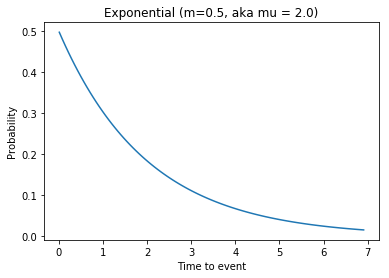

In [26]:
# Graph exponential

# np.linspace similar to np.arrange, but determines step size from
#  end points and number of points
x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.999), 100)

plt.figure()
plt.plot(x, stats.expon.pdf(x, scale=mu))
plt.title('Exponential (m={0}, aka mu = {1})'.format(m, mu))
plt.xlabel('Time to event')
plt.ylabel('Probability')
plt.show()
plt.close()

### Normal<a class="anchor" id="normal"></a>

X ~ N($\mu, \sigma$)

A continuous, bell-shapped, probability distribution. It is widely used in statistics as many phenomena follow it (though not as many phenomena as some people think). Additionally the central limit theorem says that the average or sum of independent and identically distributed distributions is approximated normally distributed, regardless of the underlying distribution.

It is defined by its mean $\mu$ which determins its center and standard deviation $\sigma$ with large sigma resulting in shorter, fatter bells. It's cumulative density function is sigmoidal, centered at mu and has a sharper curve with decreasing sigma.


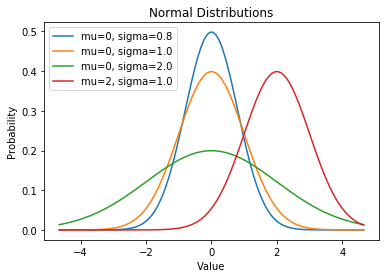

In [27]:
# normal distribution graphs
mu_sigmas = [(0, 0.8), 
             (0, 1),
             (0, 2),
             (2, 1)]

x = np.linspace(stats.norm.ppf(0.01, 0, 2), 
                stats.norm.ppf(0.99, 0, 2), 100)

plt.figure()
for mu, sigma in mu_sigmas:
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=('mu={0}, sigma={1:.1f}'.format(mu, sigma)))
    plt.title('Normal Distributions')
    plt.xlabel('Value')
    plt.ylabel('Probability')

plt.legend()
plt.show()
plt.close()

In [4]:
# Probability in a predetermined range
#   Illowsky - Example 6.10a
mu = 36.9
sigma = 13.9
x_low = 23.0
x_high = 64.7

p = stats.norm.cdf(x_high, mu, sigma) - stats.norm.cdf(x_low, mu, sigma)

print('Probability from {0} to {1} = {2:.4f}'.format(x_low, x_high, p))
print('For a normal distribution with mean of {0} and a standard deviation of {1}'.format(mu, sigma))


Probability from 23.0 to 64.7 = 0.8186
For a normal distribution with mean of 36.9 and a standard deviation of 13.9


In [5]:
# Percentile
#  Illowsky - Example 6.10c

per = 0.80 # percentile
val = stats.norm.ppf(per, mu, sigma)  # Inverse of cdf
print('{0} percent of the values are less than or equal to {1:.1f}'.format(per * 100, val)) 

80.0 percent of the values are less than or equal to 48.6


#### Standard normal distribution

A normal distribution with $\mu$ = 0 and $\sigma$ = 1. A normal distribution can be converted to standard normal using z = (x - $\mu$) / $\sigma$. This facilitates comparison of distributions. A z-score for a value is equal to the number of standard deviations from the mean, regardles of the scale of the original distribution. 

In [28]:
# Illowsky - Example 6.3
mu = 170
sigma = 6.28
x = 168 
z = (x - mu) / sigma
print('The z-score is {0:.2f}. Indicating that {1} is {2:.2f} standard deviations {3} of the mean {4}.'.\
      format(z, x, abs(z), 'left' if z < 0 else 'right', mu))

z = 1.27
x = (z * sigma) + mu
print('A z-score of {0:.2f} gives a value of {1:.2f} that is {2:.2f} standard deviations {3} of the mean {4}.'.\
      format(z, x, abs(z), 'left' if z < 0 else 'right', mu))



The z-score is -0.32. Indicating that 168 is 0.32 standard deviations left of the mean 170.
A z-score of 1.27 gives a value of 177.98 that is 1.27 standard deviations right of the mean 170.


In [29]:
# Illowsky - Example 6.8
mu = 63
sigma = 5
x = 65

p = stats.norm.sf(x, mu, sigma) # .sf = 1 - .cdf

print('Probability a random value > {0} on a normal distribution with '
      'mean {1} and standard deviation {2} is {3:.4f}'.format(x, mu, sigma, p))


Probability a random value > 65 on a normal distribution with mean 63 and standard deviation 5 is 0.3446


### Students t <a class="anchor" id="tdist"></a>

A continous probability distribution that is more accurate than the normal when the popuation standard deviation is unknown, especially when n is small, assuming the underlying population is normal. It is similar to the normal distribution, but shorter in the center and thicker in the tails. As the number of degrees of freedom (n - 1) increases, the shape changes to become more like the normal. 

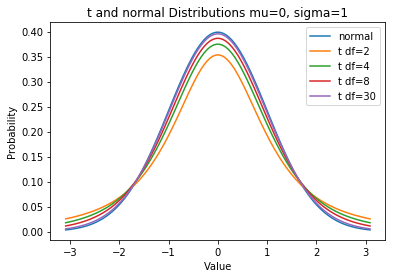

In [30]:
# t-distribution graphs
mu = 0
sigma = 1
# scipy stats.t defaults to mu = 0, sigma = 1 

x = np.linspace(stats.norm.ppf(0.001, mu, sigma), stats.norm.ppf(0.999, mu, sigma), 100)

plt.figure()

plt.plot(x, stats.norm.pdf(x, mu, sigma), label=('normal'))

dfs = [2, 4, 8, 30]
for df in dfs:
    plt.plot(x, stats.t.pdf(x, df, mu, sigma), label='t df={0}'.format(df))

plt.title('t and normal Distributions mu={0}, sigma={1}'.format(mu, sigma))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()
plt.close()

## Common scipy .stats distribution methods<a class="anchor" id="scipy"></a>

Some of the methods inherited by the rv_discrete and rv_continuous classes in Scipy. See Scipy reference guide for detail.

| method    | input\* | returns                                                 |
|:----------|:-------:|:--------------------------------------------------------|
| .stats    |         | mean, standard_dev, skew, kurtosis                      |
| .pmf      | x       | probability mass function (discrete distributions)      | 
| .pdf      | x       | probability density function (continuous distributions) |               
| .cdf      | x       | cumulative density function (tail left of x)            |
| .sf       | x       | survival function (1 - cdf) (tail right of x)           |
| .ppf      | q       | percent point function (inverse of cdf)                 |
| .interval | $\alpha$| confidence interval                                     |
| .rvs      |         | generate random numbers from distribution               |

>\* input typically includes distribution parameters as well

## Sources<a class="anchor" id="sources"></a>

Illowsky, Barbara; Dean, Susan. Introductory Statistics. OpenStax College. Kindle Edition
https://openstax.org/details/introductory-statistics

SciPy 1.0.0 Release Notes: https://docs.scipy.org/doc/scipy/reference/index.html